In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
plt.style.use("ggplot")

In [270]:
#Step-1 Gnerate Data

X,y = make_regression(n_samples=500,n_features=10,n_informative=5,noise=5, random_state=0)
print(X.shape,y.shape)
n_features = X.shape[1]

(500, 10) (500,)


In [271]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.706468,1.511639,-0.000417,0.374155,0.073285,0.701783,0.409552,-0.461894,-0.626490,-0.799593
1,-1.616956,0.640132,-0.369182,-0.239379,-0.738031,-0.024326,1.099660,0.279925,-0.098150,0.655264
2,0.093953,-0.130107,0.929505,0.582225,-2.739677,0.943046,-2.094603,-0.569312,0.269904,0.123722
3,-1.542758,-0.789954,0.537035,-0.286835,-2.369623,-0.767332,1.634406,-0.260560,0.128957,0.571227
4,-0.101003,-2.231538,0.436187,1.571463,1.324868,-0.587375,1.077315,0.840648,0.261106,0.811090


In [272]:
#Step->2 Normalise
def normalise(X):
  u = X.mean(axis=0)
  std = X.std(axis=0)
  return (X-u)/std

In [273]:
X = normalise(X)
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


In [274]:
X.mean(axis=0) #It will iterates over Rows.

array([-2.75335310e-17,  5.82867088e-17, -1.06581410e-17, -1.39888101e-17,
        2.49800181e-18,  4.28546088e-17,  1.43635104e-17,  1.46549439e-17,
        7.14983628e-17, -1.07691633e-16])

In [275]:
X.std(axis=0) #It will iterates over Columns

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

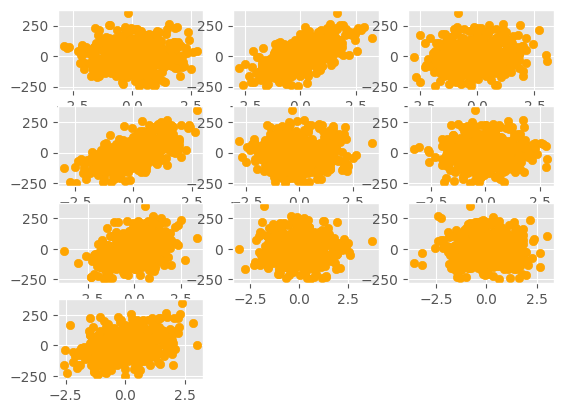

In [276]:
# Visualization
for f in range(0,10):
  plt.subplot(4,3,f+1)
  plt.scatter(X[:,f],y,c="orange")
  # plt.title(f)
plt.show()

In [277]:
#Train Test Split
XT, Xt, yT, yt = train_test_split(X,y,test_size=0.3,random_state=0,shuffle=False)

In [278]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(350, 10) (350,)
(150, 10) (150,)


In [279]:
def preprocess(X):
  if X.shape[1] == n_features:
      m=X.shape[0]
      ones = np.ones((m,1))
      X = np.hstack((ones,X))
  return X

In [280]:
def hypothesis(X,theta):
  return np.dot(X,theta) #Fast/Vectorized--->faster than loops

def loss(X,y,theta):
  yp = hypothesis(X,theta)
  error = np.mean((y-yp)**2)
  return error

def gradient(X,y,theta):
  yp = hypothesis(X,theta)
  grad = np.dot(X.T,(yp-y))
  m = X.shape[0]
  return grad/m

def train(X,y,learning_rate=0.1,max_Itrs=100):
  n = X.shape[1]
  theta = np.random.randn(n)
  error_list=[]
  for i in range(max_Itrs):
    e = loss(X,y,theta)
    error_list.append(e)
    grad = gradient(X,y,theta)
    theta = theta - learning_rate*grad

  plt.plot(error_list)
  plt.show()
  return theta

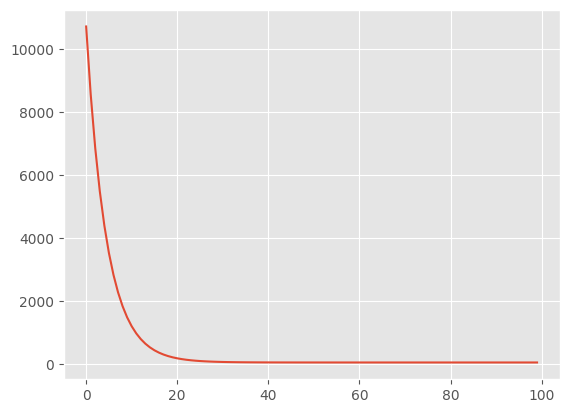

[-2.03126332e-01  6.06790237e+01  1.04998796e+01  6.38490975e+01
 -9.90421601e-02 -1.20550830e-01  4.08618685e+01 -1.25358592e-02
  2.95597893e-02  2.51174937e+01]


In [281]:
theta = train(XT,yT)
print(theta)

In [282]:
pd.DataFrame(X).head()

,0,1,2,3,4,5,6,7,8,9
0,1.764831,1.579606,0.093808,0.341546,0.103202,0.745205,0.421736,-0.461091,-0.710885,-0.761760
1,-1.612963,0.709920,-0.277540,-0.301827,-0.693297,-0.045695,1.116862,0.265971,-0.166048,0.714702
2,0.125936,-0.058708,1.030243,0.559735,-2.658385,1.007996,-2.100631,-0.566372,0.213499,0.175267
3,-1.537551,-0.717175,0.635024,-0.351591,-2.295090,-0.855000,1.655498,-0.263762,0.068151,0.629417
4,-0.072209,-2.155744,0.533470,1.597083,1.331926,-0.658985,1.094355,0.815541,0.204426,0.872842


(350, 11) (150, 11)


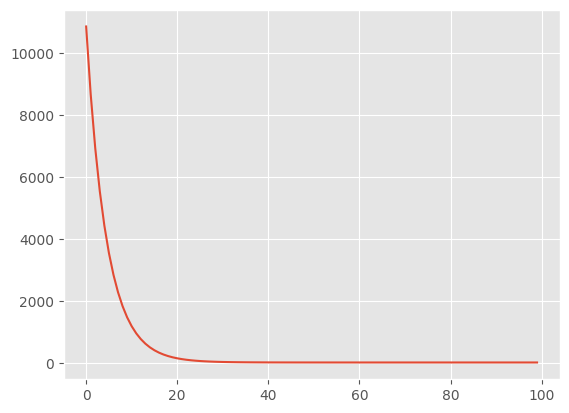

[-3.99790382e+00 -5.20942229e-02  6.06112432e+01  1.07813850e+01
  6.38216170e+01 -9.18374847e-02  1.83640838e-01  4.09575757e+01
  1.04716617e-01  1.48646825e-01  2.49722911e+01]


In [283]:
XT = preprocess(XT)
Xt = preprocess(Xt)
# pd.DataFrame(XT).head()
print(XT.shape,Xt.shape)

theta = train(XT,yT)
print(theta)

In [284]:
#Model Evaluation
def r2Score(y,yp):
  ymean = y.mean()
  num = np.sum((y-yp)**2)
  deno = np.sum((y-ymean)**2)
  return (1-num/deno)*100

In [285]:
yp = hypothesis(Xt,theta)

In [286]:
print(r2Score(yt,yp))

99.73099747014143


In [287]:
## Linear Rgression with SK-Learn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(XT, yT)
yp = model.predict(Xt)
print("yp shape:", yp.shape)
print("R2 Score:", model.score(Xt, yt)*100)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


yp shape: (150,)
R2 Score: 99.73093486277892
Intercept: -3.998302572780272
Coefficients: [ 0.00000000e+00 -5.15429677e-02  6.06117241e+01  1.07835763e+01
  6.38252732e+01 -9.35864489e-02  1.81239163e-01  4.09608198e+01
  1.05857376e-01  1.46070826e-01  2.49696665e+01]


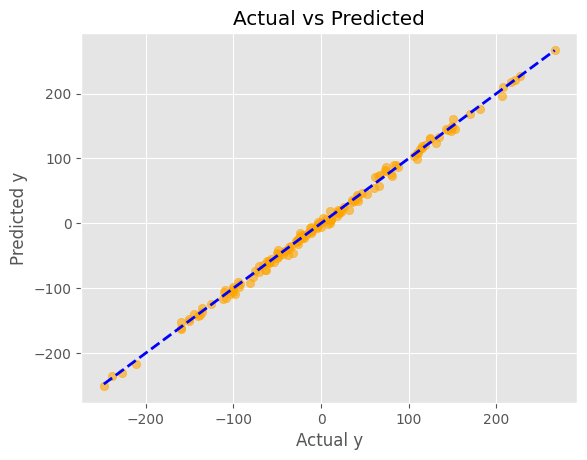

In [294]:
import matplotlib.pyplot as plt

plt.scatter(yt, yp, color='orange', alpha=0.6)
plt.plot([yt.min(), yt.max()], [yt.min(), yt.max()], 'k--', lw=2,c="blue")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.title("Actual vs Predicted")
plt.show()
